## Car Price Prediction with Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('cardata.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.shape

(301, 9)

In [6]:
df.duplicated().sum()

2

In [7]:
# 2 duplicates are present so drop them
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#converting the dtype of year
df['Year']=pd.to_datetime(df['Year'],format = '%Y').dt.year

In [10]:
df['Owner']=df['Owner'].astype('int32')
df['Kms_Driven']=df['Kms_Driven'].astype('int32')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int32  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int32  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int32  
dtypes: float64(2), int32(3), object(4)
memory usage: 19.9+ KB


In [12]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())
print(df['Year'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']
[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
# Selecting necessary data for model building
my_data=df.drop(['Car_Name'],axis=1)
my_data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [15]:
my_data['Current_Year']=2024

In [16]:
my_data['Age_of_Car']=my_data['Current_Year'] - my_data['Year']
my_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age_of_Car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [17]:
my_data.drop(['Current_Year','Year'],axis=1,inplace=True)
my_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


## Encoding

In [19]:
my_data=pd.get_dummies(data=my_data,drop_first=True)
my_data

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,8,True,False,False,True
297,4.00,5.90,60000,0,9,False,True,False,True
298,3.35,11.00,87934,0,15,False,True,False,True
299,11.50,12.50,9000,0,7,True,False,False,True


In [20]:
data=['Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']
my_data[data]=my_data[data].astype('int')
my_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [21]:
my_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876378,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876378,1.000000,0.205253,0.009947,0.053563,0.464849,-0.456746,-0.511686,-0.334265
Kms_Driven,0.028566,0.205253,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009947,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
Age_of_Car,-0.234369,0.053563,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.543541,0.464849,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456746,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Seller_Type_Individual,-0.553851,-0.511686,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334265,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


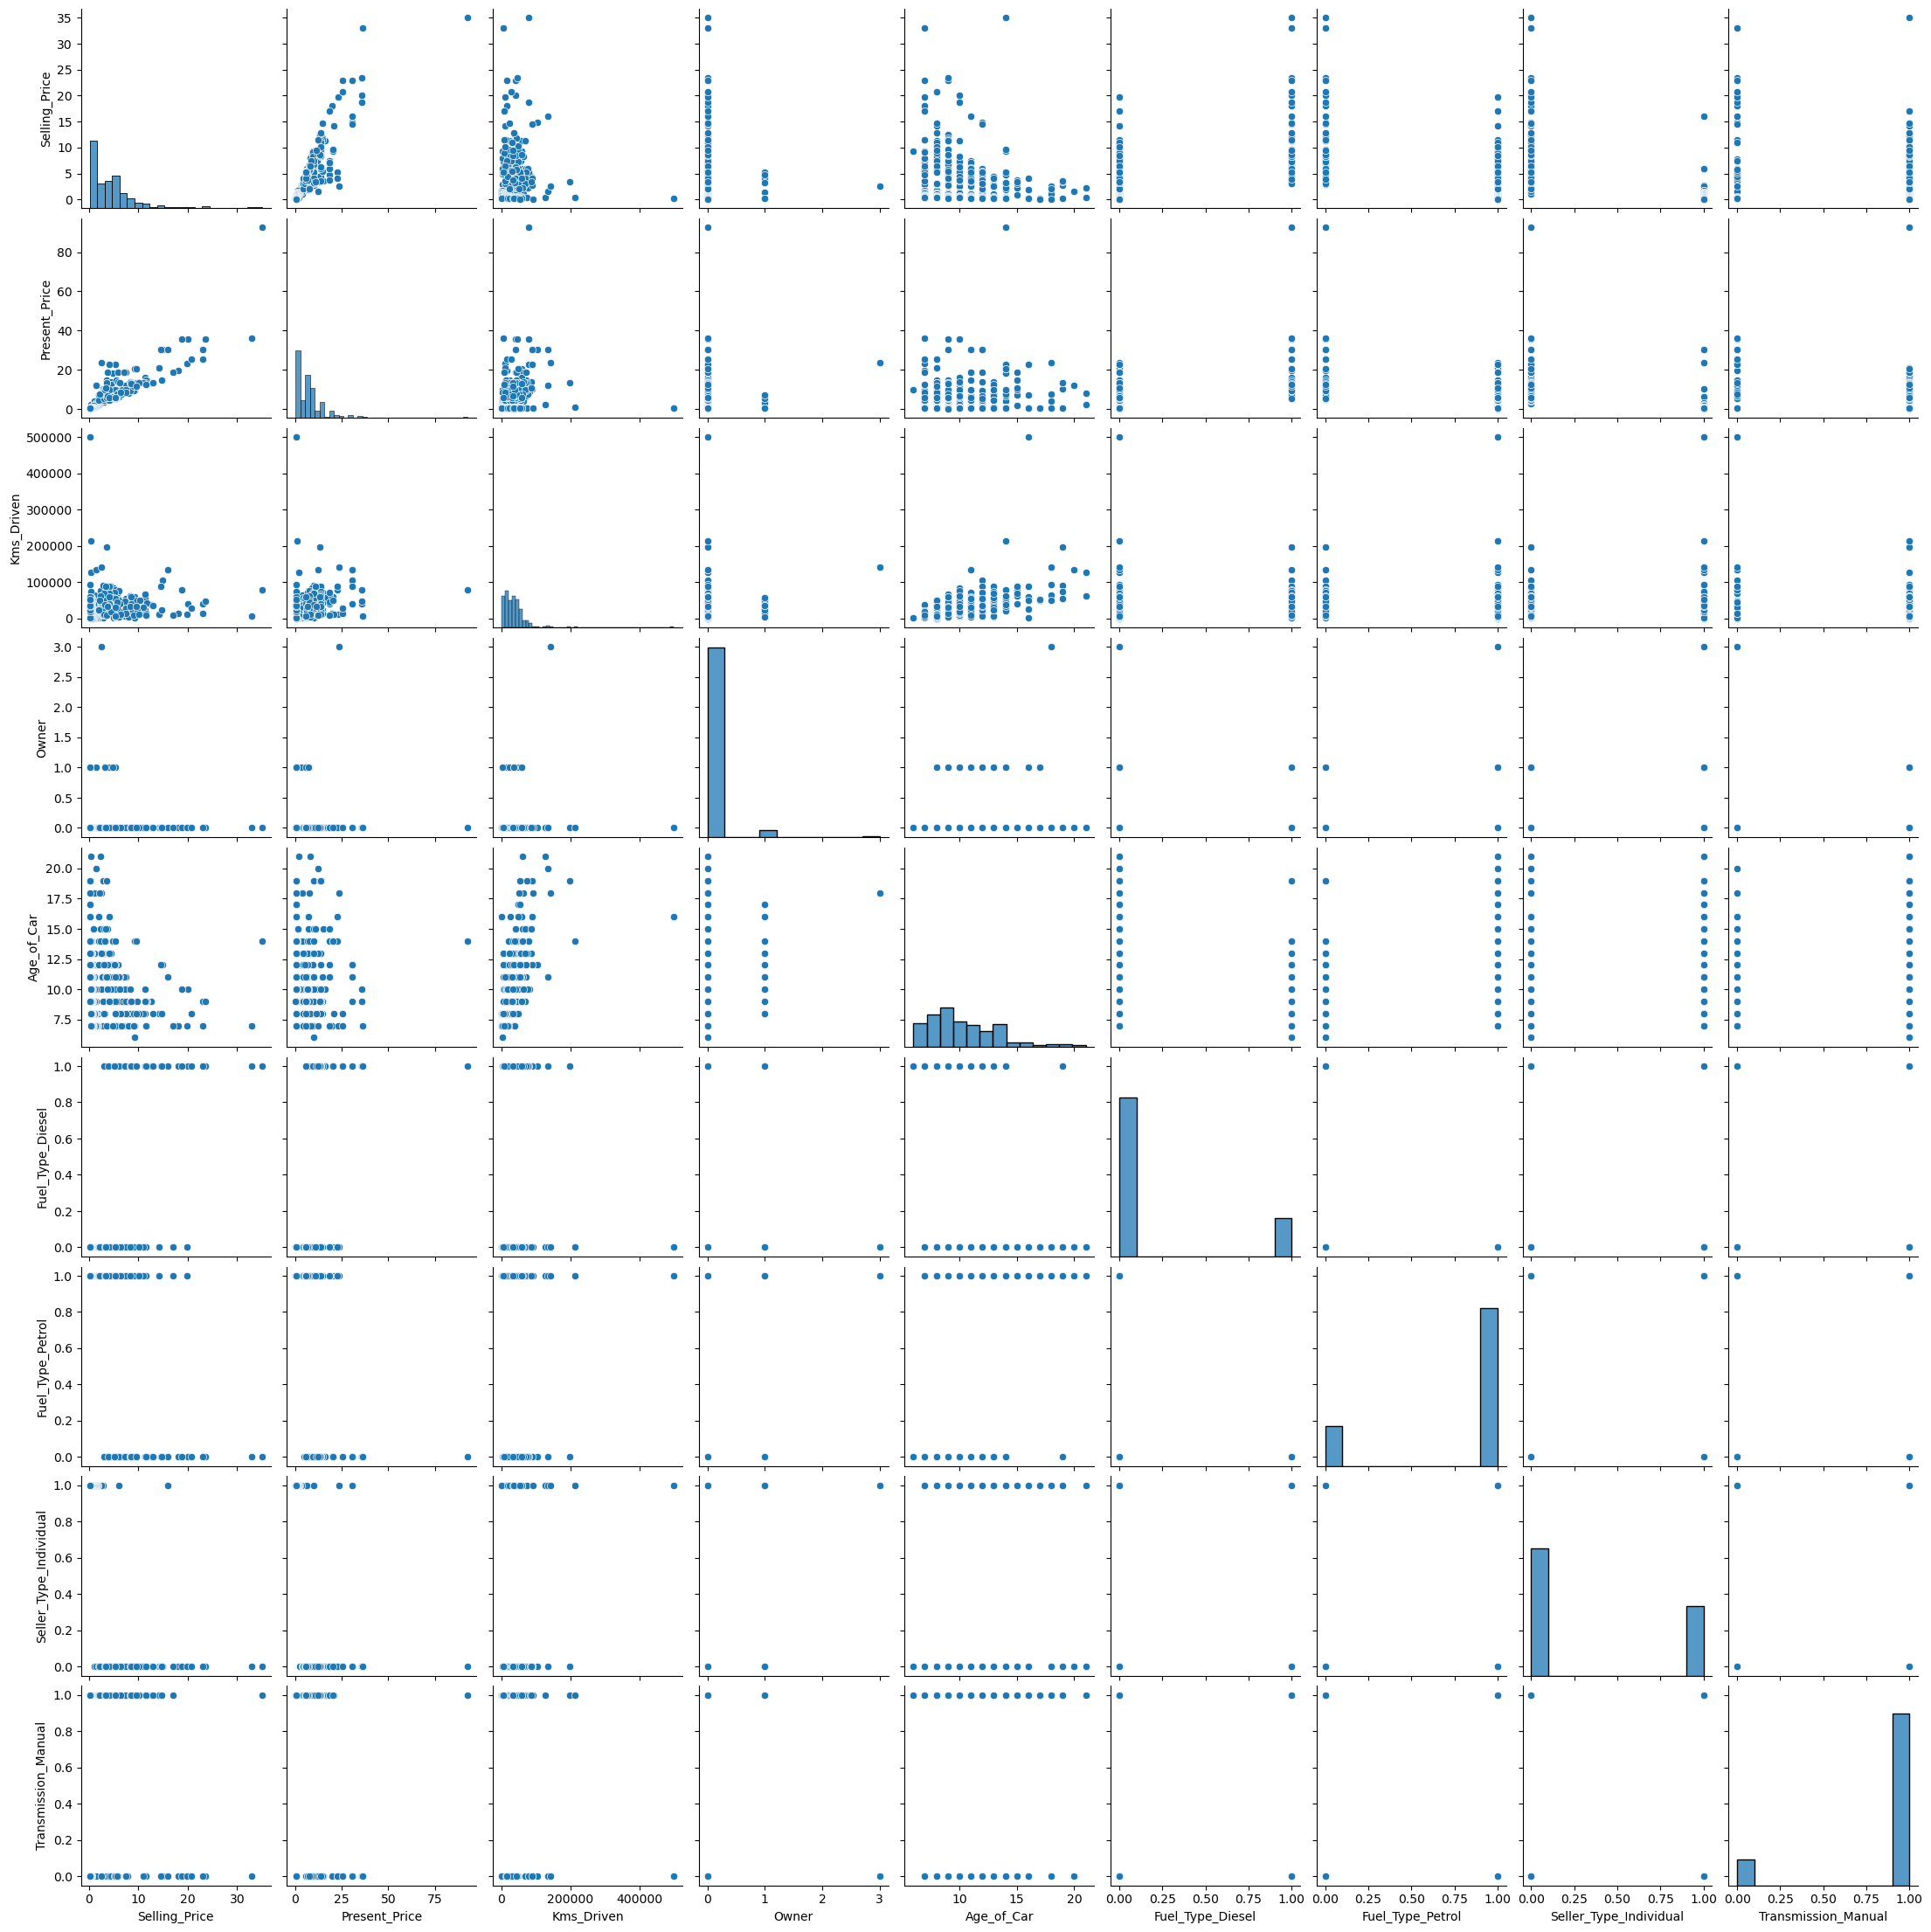

In [22]:
sns.pairplot(my_data)

<Axes: >

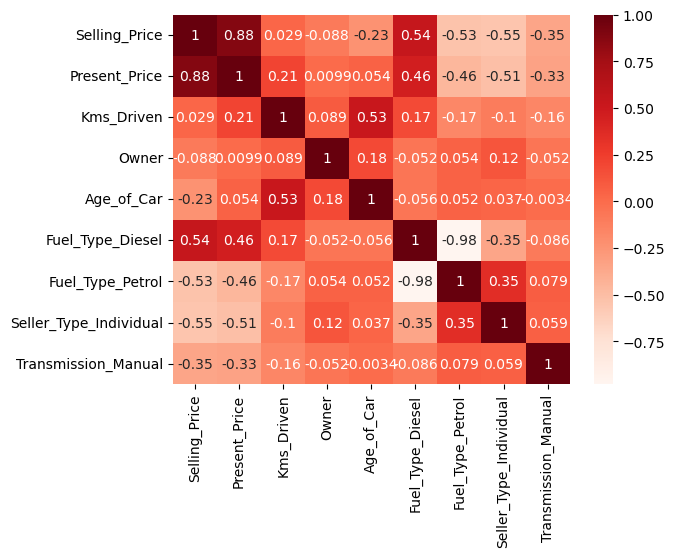

In [23]:
sns.heatmap(my_data.corr(),annot=True,cmap='Reds')

<Axes: ylabel='Density'>

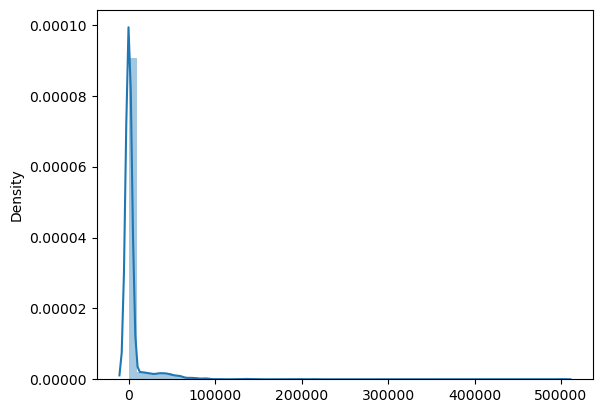

In [24]:
sns.distplot(my_data)

In [25]:
# Splitting of data
target=my_data[['Selling_Price']]
features=my_data.drop(columns=['Selling_Price'])

In [26]:
target

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [27]:
features

,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,0,1,0,1
1,9.54,43000,0,11,1,0,0,1
2,9.85,6900,0,7,0,1,0,1
3,4.15,5200,0,13,0,1,0,1
4,6.87,42450,0,10,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,8,1,0,0,1
297,5.90,60000,0,9,0,1,0,1
298,11.00,87934,0,15,0,1,0,1
299,12.50,9000,0,7,1,0,0,1


# Building Model

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=100)
model.fit(x_train,y_train)

LinearRegression()

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(209, 8)
(209, 1)
(90, 8)
(90, 1)


In [32]:
x_test

,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,9.40,61381,0,9,1,0,0,1
141,0.80,20000,0,8,0,1,1,1
237,13.60,68000,0,9,1,0,0,1
177,0.57,24000,0,8,0,1,1,0
232,14.79,12900,0,9,0,1,0,0
...,...,...,...,...,...,...,...,...
289,13.60,10980,0,8,0,1,0,1
30,5.98,51439,0,12,1,0,0,1
166,0.55,1000,0,8,0,1,1,1
235,9.40,15141,0,7,0,1,0,1


In [33]:
y_test

,Selling_Price
223,8.25
141,0.60
237,11.25
177,0.35
232,11.45
...,...
289,10.11
30,3.10
166,0.45
235,9.10


In [34]:
y_pred=model.predict(x_test)

In [35]:
y_pred[3]

array([1.51349762])

Text(0, 0.5, 'y_pred')

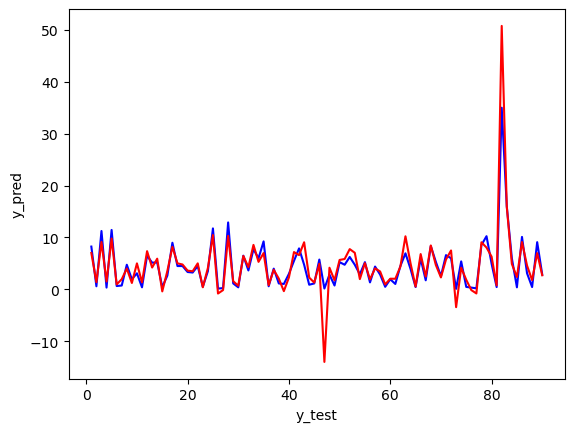

In [36]:
x=[i for i in range(1,91,1)]
plt.plot(x,y_test,color='Blue')
plt.plot(x,y_pred,color='Red')
plt.xlabel('y_test')
plt.ylabel('y_pred')

Text(0, 0.5, 'y_pred')

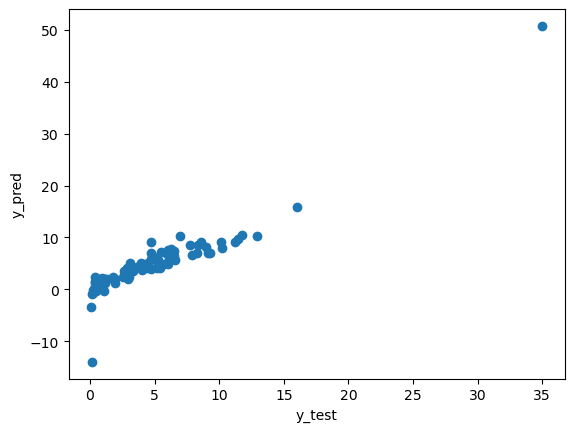

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

## Evaluation

In [39]:
model.score(x_test,y_test)

0.7076950908215072

In [40]:
# R**2 performance of model same as score
# R**2=SSR/SST=1-SSE/SST
# SST=SSR+SSE
SSE=((y_test-y_pred)**2).sum()
SSE

Selling_Price    586.899145
dtype: float64

In [41]:
SST=((y_test-y_test.mean())**2).sum()
SST

Selling_Price    2007.831982
dtype: float64

In [42]:
Rsquared=1-SSE/SST
Rsquared

Selling_Price    0.707695
dtype: float64